In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import filtfilt, firwin, resample
import numpy as np
from scipy.fftpack import fft

In [68]:
plt.style.use('dark_background')

## READ DATA

In [3]:
dev01 = pd.read_csv('../data/device1.csv')
dev02 = pd.read_csv('../data/device2.csv')

In [4]:
print(dev01.head()); print(dev02.head())


                                                name                 time  \
0  1db151b558e41886b020cc1891f03ae6158402f5b06640...  1573135937000000000   
1  1db151b558e41886b020cc1891f03ae6158402f5b06640...  1573135937000000000   
2  1db151b558e41886b020cc1891f03ae6158402f5b06640...  1573135937000000000   
3  1db151b558e41886b020cc1891f03ae6158402f5b06640...  1573135937005000000   
4  1db151b558e41886b020cc1891f03ae6158402f5b06640...  1573135937005000000   

   index  lead  value  
0      0     1  -6179  
1      0     3 -22895  
2      0     2 -29127  
3      1     3 -19360  
4      1     2 -25787  
                                                name                 time  \
0  ffa9b5da13303ca9a6fef8fb4ee0a1387d8cc299c97265...  1573136185000000000   
1  ffa9b5da13303ca9a6fef8fb4ee0a1387d8cc299c97265...  1573136185000000000   
2  ffa9b5da13303ca9a6fef8fb4ee0a1387d8cc299c97265...  1573136185000000000   
3  ffa9b5da13303ca9a6fef8fb4ee0a1387d8cc299c97265...  1573136185005000000   
4  ffa9b

In [116]:
2.5 * 60

150.0

Text(0.5,0,'time(s)')

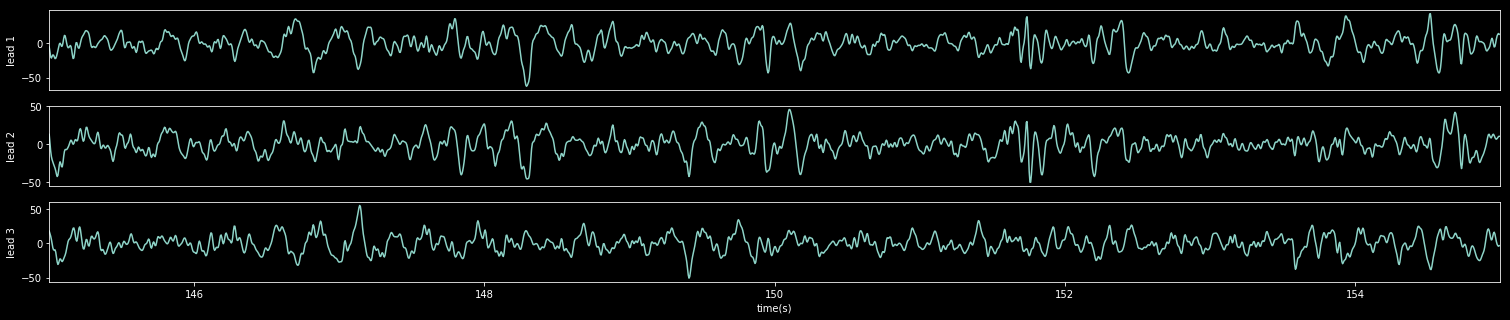

In [121]:
fs = 200

poles = firwin(200, [2/(fs/2),40/(fs/2)], pass_zero=False)


# filtered_1 = dev01.query('lead==1')['value'].values
# filtered_2 = dev01.query('lead==2')['value'].values
# filtered_3 = dev01.query('lead==3')['value'].values

filtered_1 = filtfilt(poles, 1.0, dev02.query('lead==1')['value'].values)
filtered_2 = filtfilt(poles, 1.0, dev02.query('lead==2')['value'].values)
filtered_3 = filtfilt(poles, 1.0, dev02.query('lead==3')['value'].values)

init = 29000
tf = 10
end = init + fs * tf

N = np.arange(init,end)
plt.figure(figsize=(26,5))
plt.subplot(3,1,1)
plt.plot(N * 1/fs, filtered_1[N])
plt.xlim([init*1/fs, end*1/fs])
plt.ylabel("lead 1")
plt.xticks([])
plt.subplot(3,1,2)
plt.plot(N * 1/fs,filtered_2[N])
plt.xlim([init*1/fs, end*1/fs])
plt.ylabel("lead 2")
plt.xticks([])
plt.subplot(3,1,3)
plt.plot(N * 1/fs, filtered_3[N])
plt.xlim([init*1/fs, end*1/fs])
plt.ylabel("lead 3")
plt.xlabel("time(s)")


Text(0.5,0,'frequency(Hz)')

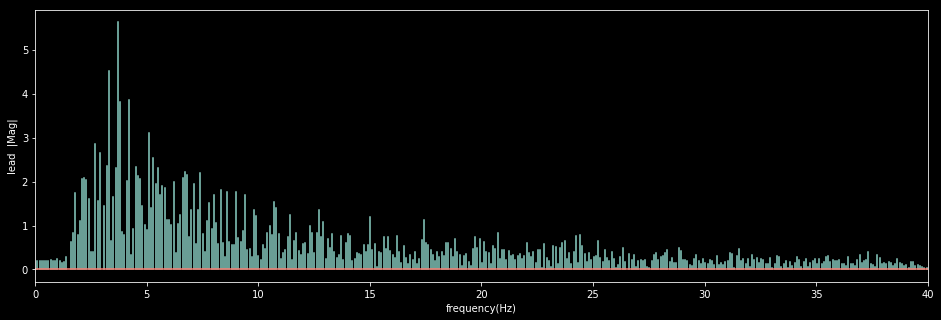

In [122]:
Nsize = filtered_2[N].size
T = 1.0 / 200.0

plt.figure(figsize=(16,5))
yf = fft(filtered_3[N] - np.mean(filtered_3[N]) )
xf = np.linspace(0.0, 1.0/(2.0*T), Nsize//2)
plt.stem(xf, 2.0/Nsize * np.abs(yf[0:Nsize//2]),  markerfmt=" ")
plt.xlim([0,40]);
plt.ylabel('lead  |Mag|')
plt.xlabel('frequency(Hz)')

In [119]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.fourier import\
    FT_continuous, IFT_continuous, sinegauss, sinegauss_FT, wavelet_PSD

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.


#------------------------------------------------------------
# Sample the function: localized noise
np.random.seed(0)

x = filtered_2[N]
N_size = len(x)
t = np.linspace(0,4.995, N_size)
#------------------------------------------------------------
# Compute an example wavelet
W = sinegauss(t, 0, 1.5, Q=1.0)
#------------------------------------------------------------
# Compute the wavelet PSD
f0 = np.linspace(0.67, 20, 200)
wPSD = wavelet_PSD(t, x, f0, Q=2.0)



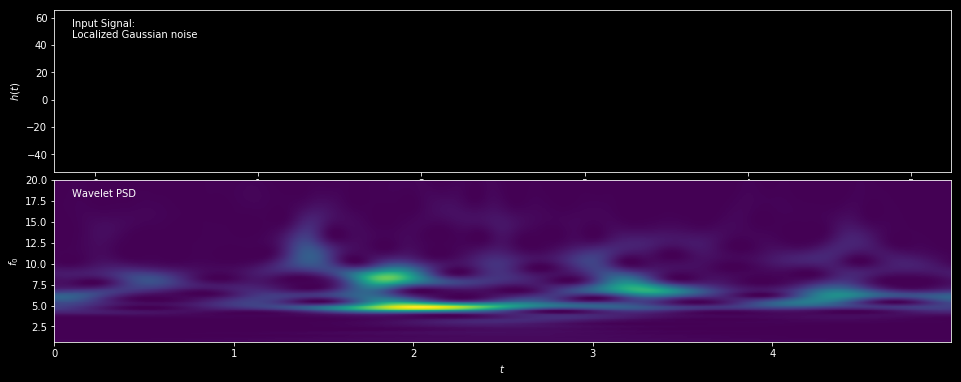

In [120]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(15, 8))
fig.subplots_adjust(hspace=0.05, left=0.12, right=0.95, bottom=0.08, top=0.95)

# First panel: the signal
ax = fig.add_subplot(311)
ax.plot(t, x, '-k', lw=1)
ax.text(0.02, 0.95, ("Input Signal:\n"
                     "Localized Gaussian noise"),
        ha='left', va='top', transform=ax.transAxes)
ax.set_ylabel('$h(t)$')

# Second panel: an example wavelet
ax = fig.add_subplot(312)
ax.imshow(wPSD, origin='lower', aspect='auto',
          extent=[t[0], t[-1], f0[0], f0[-1]])

ax.text(0.02, 0.95, ("Wavelet PSD"), color='w',
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel('$t$')
ax.set_ylabel('$f_0$')

plt.show()

In [7]:
x.shape

(5000,)

In [10]:
import matplotlib.pylab as pylab
import numpy as np
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

def g_h_filter(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    for z in data:
        # prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        dx = dx + h * (residual) / dt
        x_est = x_pred + g * residual
        results.append(x_est)
    return np.array(results)

data = g_h_filter(data=weights, x0=160., dx=1., g=6./10, h=2./3, dt=1.)


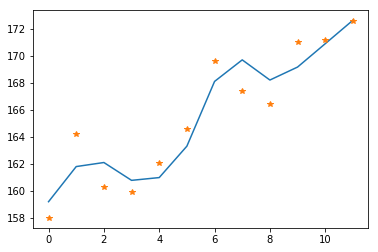

In [14]:
plt.plot(data)
plt.plot(weights, '*')

In [7]:
)

SyntaxError: invalid syntax (<ipython-input-7-a35077a93b18>, line 1)